# README


* Purposes of this Code:
    * Use Gala package to integrate orbits and calculate actions for the Marchetti Subset


* Marchetti Subset:
    * https://arxiv.org/abs/1804.10607 


* Packages Required:
    * astropy: http://www.astropy.org/
    * numpy: http://www.numpy.org/
    * matplotlib: https://matplotlib.org/
    * gala: https://gala-astro.readthedocs.io/en/latest/index.html

In [47]:
#Importing required packages
import astropy.units as u
from astropy.table import Table 
import matplotlib.pyplot as plt
import numpy as np
import gala.integrate as gi
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

In [26]:
#Reading in Marchetti data and creating variables in kpc and km/s
data_table = Table.read('/home/douglas/data.fits', format = 'fits') 
U = np.array(data_table["U"])
V = np.array(data_table["V"])
W = np.array(data_table["W"])     
X = np.array(data_table["xGC"])*0.001           
Y = np.array(data_table["yGC"])*0.001
Z = np.array(data_table["zGC"])*0.001

In [28]:
#Creating potential instance
pot = gp.MilkyWayPotential(units=galactic) #galactic = Myr; M_sun; kpc

#Creating initial conditions for first Marchetti source
ics = gd.PhaseSpacePosition(pos=[X[0],Y[0],Z[0]] * u.kpc,
                            vel=[U[0],V[0],W[0]] * u.km/u.s)

In [31]:
#Creating time range.
N = 100000
ts = np.linspace(0,10,N)  #Gyr
dt = (ts[1]-ts[0]) * 1000  #Converting Myr to Gyr

#Creating orbit
orbit = gp.Hamiltonian(pot).integrate_orbit(ics, dt=dt, n_steps=N)

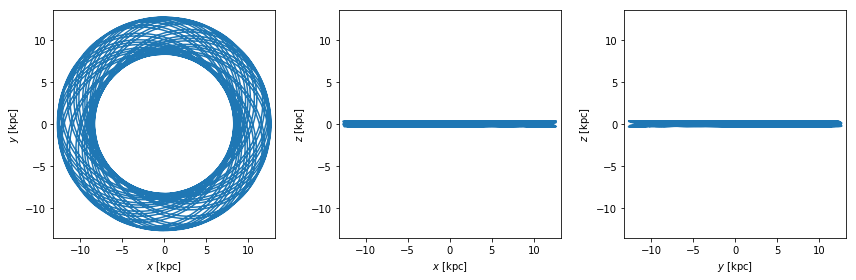

In [32]:
#Plotting orbit
fig = orbit.plot()

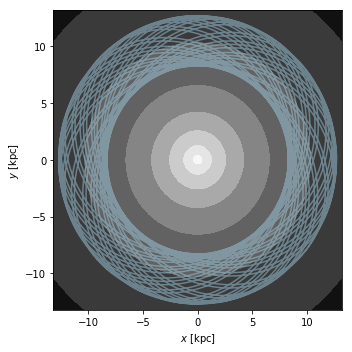

In [46]:
#Plotting orbit on top of potential contour plot
grid = np.linspace(-15,15,64)
fig,ax = plt.subplots(1, 1, figsize=(5,5))
fig = pot.plot_contours(grid=(grid,grid,0), cmap='Greys', ax=ax)
fig = orbit.plot(['x', 'y'], color='#9ecae1', alpha=0.5,
                      axes=[ax], auto_aspect=False)